# Group Coursework 

## Preparing Dataset

**Import Library**

In [121]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp

import scipy.stats as sps

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

**Pulling Data**

Original data file is from https://data.london.gov.uk/dataset/ward-profiles-and-atlas

According to the research question, some variables from original file is copied to CSV file

* Borough
* Names
* Median Age in 2011
* Population Density (persons per sq km) in 2011
* No people in household have English as a main language 2011
* All Households 2011
* Mean Modelled Household income (£) 
* Economically active: % Unemployed 2011
* % No educational qualifications 2011
* Rates children (0-18) living in Out-of-work Benefit Claimant Households 2011
    * The numbers and percentages of children living in households where a parent or guardian claimed out-of-work benefits
* Total crime (numbers) 2011
* Total Crime Rate 2011
* Drugs Crime Total Number 2011
* % People with Bad or Very Bad Health 2011 
* % area that is greenspace 

In [124]:
gcd = pd.read_csv('copiedfromwarddataatlas.csv')

In [125]:
gcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65533 entries, 0 to 65532
Data columns (total 15 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Borough                                                                       625 non-null    object 
 1   Names                                                                         625 non-null    object 
 2   Median Age 2011                                                               625 non-null    float64
 3   Population Density (persons per sq km) 2011                                   625 non-null    float64
 4   No people in household have English as a main language 2011                   625 non-null    float64
 5   All Households 2011                                                           625 non-null    float64
 6   Mean Modelled Household income

In [126]:
gcd.head()

,Borough,Names,Median Age 2011,Population Density (persons per sq km) 2011,No people in household have English as a main language 2011,All Households 2011,Mean Modelled Household income (£) 2012/13,Economically active: % Unemployed 2011,% No qualifications 2011,Rates children (0-18) living in Out-of-work Benefit Claimant Households 2011,Total crime (numbers) 2011,Total Crime Rate 2011,Drugs Crime Total Number 2011,% People with Bad or Very Bad Health 2011,% area that is greenspace 2012
0,City of London,City of London,39.0000,"2,312.5000",523.0000,"4,385.0000","99,390.0000",4.5000,6.7000,12.0000,"5,437.0000",612.0000,450.0000,3.4000,18.6000
1,Barking and Dagenham,Abbey,29.0000,"9,884.6000","1,175.0000","4,572.0000","38,870.0000",14.5000,16.4000,28.5000,"2,346.0000",182.6000,197.0000,4.3000,19.6000
2,Barking and Dagenham,Alibon,32.0000,"7,464.3000",315.0000,"3,971.0000","37,290.0000",12.2000,31.2000,33.5000,955.0000,91.4000,45.0000,6.7000,22.4000
3,Barking and Dagenham,Becontree,32.0000,"8,923.1000",451.0000,"4,277.0000","37,860.0000",13.8000,28.0000,32.6000,"1,146.0000",98.8000,58.0000,7.0000,3.0000
4,Barking and Dagenham,Chadwell Heath,34.0000,"2,970.6000",257.0000,"3,942.0000","38,860.0000",12.1000,29.1000,30.2000,984.0000,97.4000,26.0000,6.8000,56.4000


In [127]:
gcd = gcd.dropna()

**Data Clean**

Eliminating effect of population and scale problem

In [128]:
#Transforming the number of people in household that is not have English as main language to rate per 1000 household among all household
no_english_in_household = gcd["No people in household have English as a main language 2011"]/gcd["All Households 2011"]*1000

#Transforming the number of drugs related crime number to rate of drugs crime per 1000 crime
rate_of_drugs_crime = gcd["Drugs Crime Total Number 2011"]/gcd["Total crime (numbers) 2011"]*1000

Normalization of Income (Min-Max Scalar)

In [129]:
#normalised income per 1000
max_income = gcd["Mean Modelled Household income (£) 2012/13"].max(axis=0)
min_income = gcd["Mean Modelled Household income (£) 2012/13"].min(axis=0)
norm_income = ((gcd["Mean Modelled Household income (£) 2012/13"] - min_income)/(max_income-min_income))*1000

**Getting dependent and independent variables** 

In [130]:
#as independent variable
out_of_work = gcd["Rates children (0-18) living in Out-of-work Benefit Claimant Households 2011"]

#as dependent variables 
norm_income 
rate_of_drugs_crime
no_english_in_household
median_age = gcd["Median Age 2011"]
population_density = gcd["Rates children (0-18) living in Out-of-work Benefit Claimant Households 2011"]
unemployment_rate = gcd["Economically active: % Unemployed 2011"] 
no_qualification = gcd["% No qualifications 2011"]
total_crime_rate = gcd["Total Crime Rate 2011"] 
people_in_bad_health = gcd["% People with Bad or Very Bad Health 2011"] 
green_space = gcd["% area that is greenspace 2012"] 

**Creating Independent Dataset**

In [131]:
gcd_independent = pd.DataFrame()
gcd_dependent = pd.DataFrame()
dict1 = {'norm_income': norm_income, 'rate_of_drugs_crime': rate_of_drugs_crime,
         'no_english_in_household': no_english_in_household, 'median_age': median_age,
        'population_density': population_density, 'unemployment_rate': unemployment_rate,
        'no_qualification': no_qualification, 'total_crime_rate': total_crime_rate,
        'people_in_bad_health': people_in_bad_health, 'green_space': green_space} 
gcd_independent = pd.DataFrame(dict1)
dict2 = {'out_of_work': out_of_work} 
gcd_dependent = pd.DataFrame(dict2)

In [132]:
gcd_independent_final_csv_data = gcd_independent.to_csv('gcd_independent_final.csv', index = True) 

In [133]:
gcd_dependent_final_csv_data = gcd_dependent.to_csv('gcd_dependent_final.csv', index = True) 

## Data Summarise

In [134]:
gcd_independent.describe()

,norm_income,rate_of_drugs_crime,no_english_in_household,median_age,population_density,unemployment_rate,no_qualification,total_crime_rate,people_in_bad_health,green_space
count,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000
mean,140.0502,66.2585,128.5571,34.3072,21.8418,8.7282,17.6218,98.4952,4.9218,27.1251
std,115.9890,35.1483,74.8317,3.9974,10.1675,3.2776,6.0356,110.5444,1.2615,17.5768
min,0.0000,11.1465,4.3228,26.0000,0.7000,3.1000,3.8000,25.6000,1.8000,0.0000
25%,67.2426,42.1394,70.2128,31.0000,13.3000,6.0000,13.5000,62.4000,4.1000,13.8000
50%,111.6793,58.2121,118.8400,33.0000,21.8000,8.4000,17.4000,81.4000,4.8000,23.5000
75%,172.0802,81.1710,180.9705,37.0000,29.4000,10.9000,21.6000,104.9000,5.7000,36.8000
max,"1,000.0000",278.5515,367.2220,46.0000,48.7000,19.4000,35.8000,"1,971.4000",10.9000,88.8000


In [135]:
gcd_dependent.describe()

,out_of_work
count,625.0000
mean,21.8418
std,10.1675
min,0.7000
25%,13.3000
50%,21.8000
75%,29.4000
max,48.7000


## Data Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc4a45d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc800550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc4a4850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc800890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc800710>],
 'means': []}

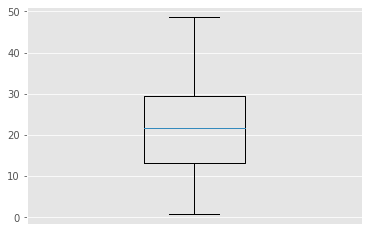

In [136]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(out_of_work, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc316210>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc511190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc316ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc793890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc793a10>],
 'means': []}

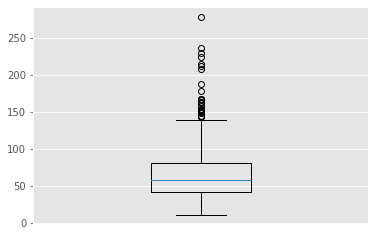

In [137]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(rate_of_drugs_crime, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc18b710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc9c91d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc18bf10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc242190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc38c590>],
 'means': []}

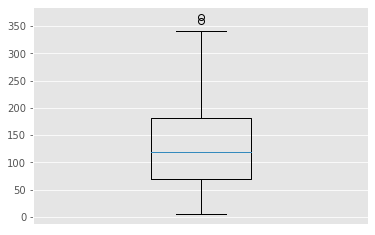

In [138]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(no_english_in_household, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc55a710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc643e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc21bc90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc465710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc46be10>],
 'means': []}

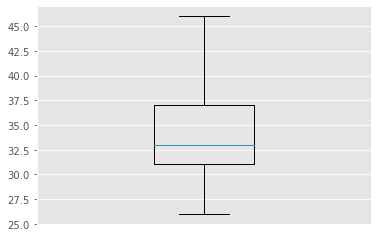

In [139]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(median_age, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc654410>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc24af10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc6548d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc24afd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fbf34e50>],
 'means': []}

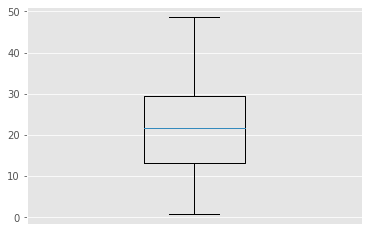

In [140]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(population_density, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc5bcdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc5ca690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc5bc950>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc5caf50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fbfbf3d0>],
 'means': []}

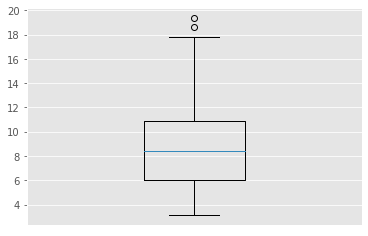

In [141]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(unemployment_rate, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc0842d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc084b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc07ce10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc0a0450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc0a0890>],
 'means': []}

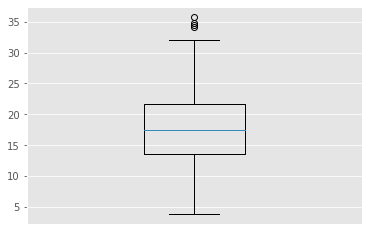

In [142]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(no_qualification, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc101750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc101fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc1012d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc1328d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc132d10>],
 'means': []}

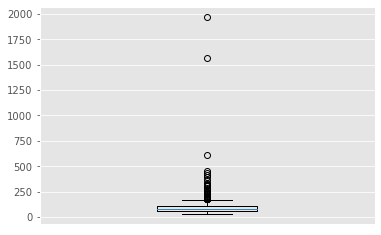

In [143]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(total_crime_rate, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc144c90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc13f550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc144810>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc13fe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc15c290>],
 'means': []}

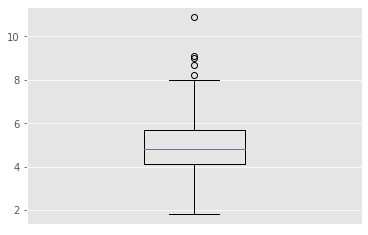

In [144]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(people_in_bad_health, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fbf72fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fbf46890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fbf72b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fbf69190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fbf695d0>],
 'means': []}

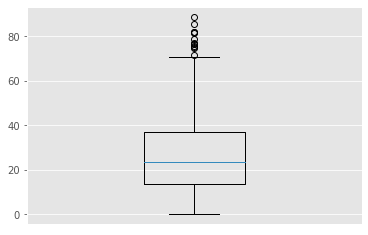

In [145]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(green_space, manage_ticks=(False))

## Before Regression

**Correlation Matrix between independent variables**

This matrix shows the correlation between predictor variables

Text(0.5, 1.0, 'Correlation Matrix')

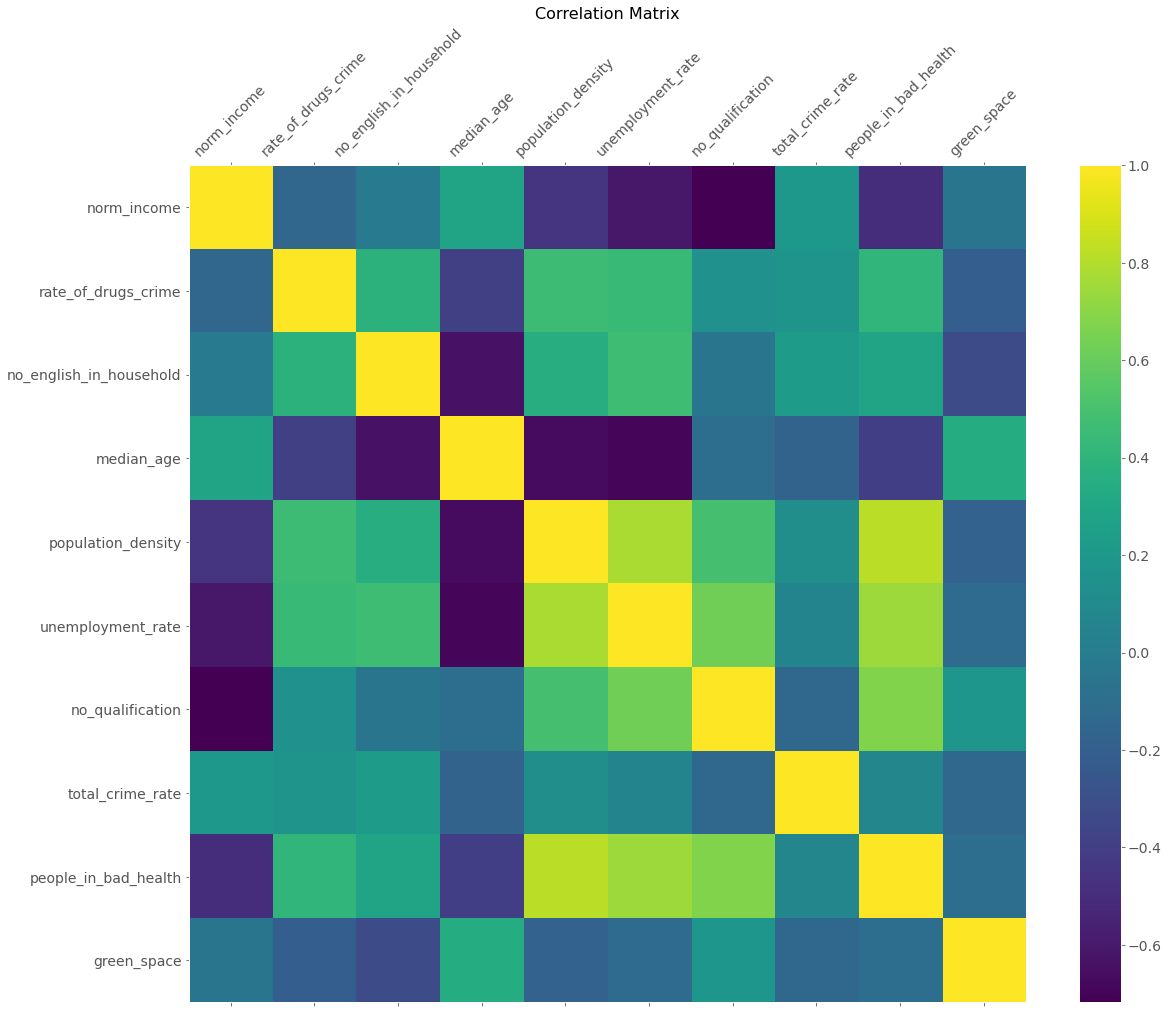

In [12]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(gcd_independent.corr(), fignum=f.number)
plt.xticks(range(gcd_independent.shape[1]), gcd_independent.columns, fontsize=14, rotation=45)
plt.yticks(range(gcd_independent.shape[1]), gcd_independent.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

**Using VIF to deal with multicollinearity**

Calculating VIF and dropping specific dataset if it is bigger than threshold(5)

In [13]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            print('No columns dropped because VIF values are below threshold')
            break

    return df

In [81]:
gcd_predictors_selected_VIF = drop_column_using_vif_(gcd_independent)
print("The columns remaining after VIF selection are:")
print(gcd_predictors_selected_VIF.columns)

Dropping: population_density
Dropping: unemployment_rate
No columns dropped because VIF values are below threshold
The columns remaining after VIF selection are:
Index(['norm_income', 'rate_of_drugs_crime', 'no_english_in_household',
       'median_age', 'no_qualification', 'total_crime_rate',
       'people_in_bad_health', 'green_space'],
      dtype='object')


After VIF Method: 

Text(0.5, 1.0, 'Correlation Matrix')

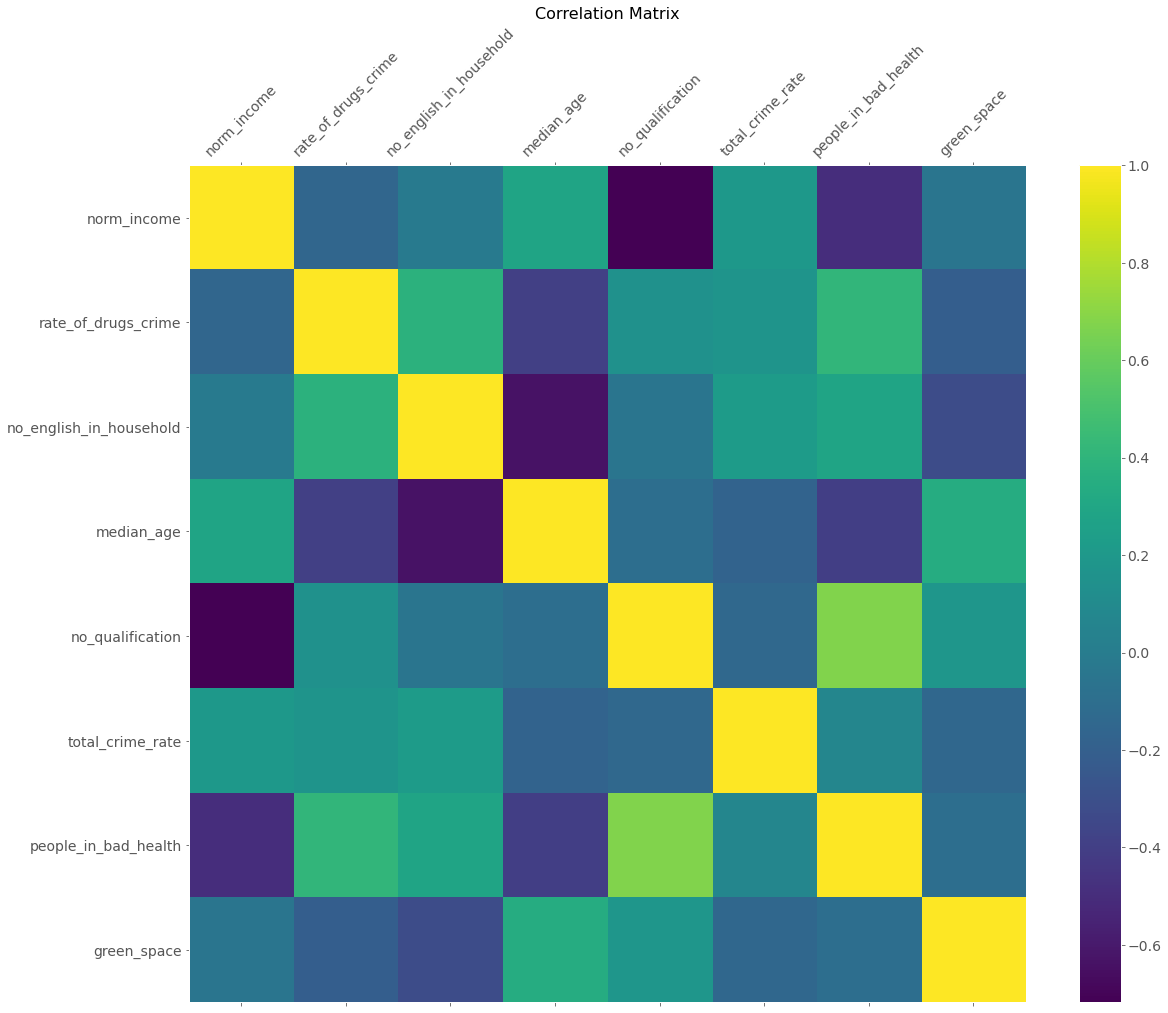

In [118]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(gcd_predictors_selected_VIF.corr(), fignum=f.number)
plt.xticks(range(gcd_predictors_selected_VIF.shape[1]), gcd_predictors_selected_VIF.columns, fontsize=14, rotation=45)
plt.yticks(range(gcd_predictors_selected_VIF.shape[1]), gcd_predictors_selected_VIF.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

## Multiple Regression

In [146]:
X_values = sm.add_constant(gcd_predictors_selected_VIF)
y_values = gcd_dependent

In [147]:
regression_model_a = sm.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     384.9
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          6.56e-234
Time:                        18:25:28   Log-Likelihood:                -1776.0
No. Observations:                 625   AIC:                             3570.
Df Residuals:                     616   BIC:                             3610.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Fitted vs Residuals Graphs (LINE Condition Check)

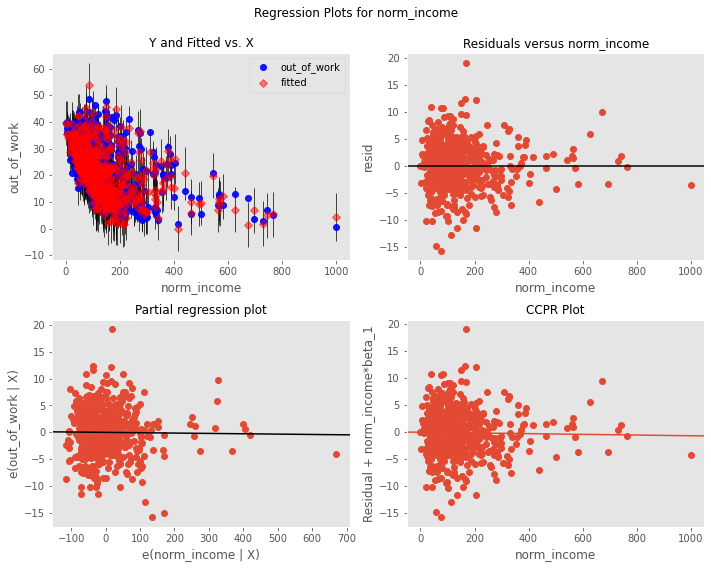

In [95]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'norm_income',fig=fig)

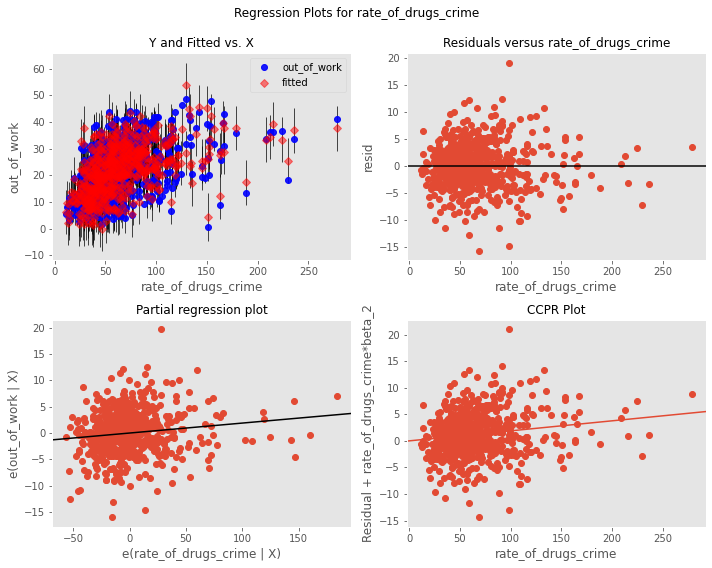

In [96]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'rate_of_drugs_crime',fig=fig)

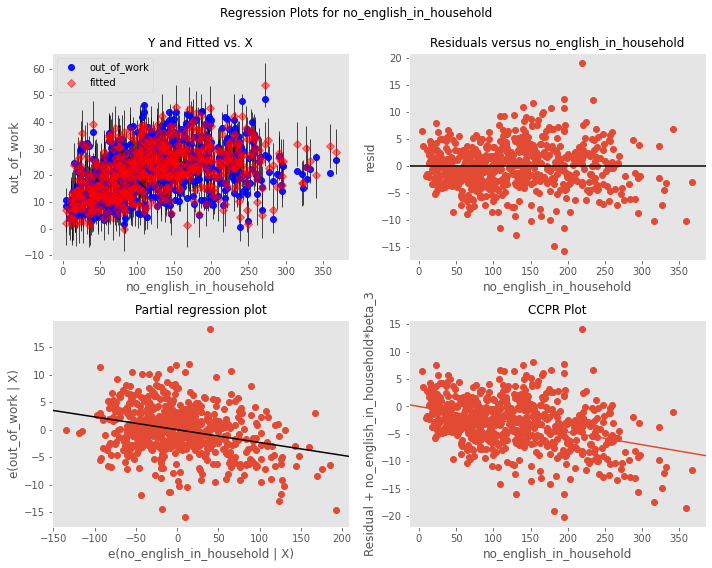

In [98]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'no_english_in_household',fig=fig)

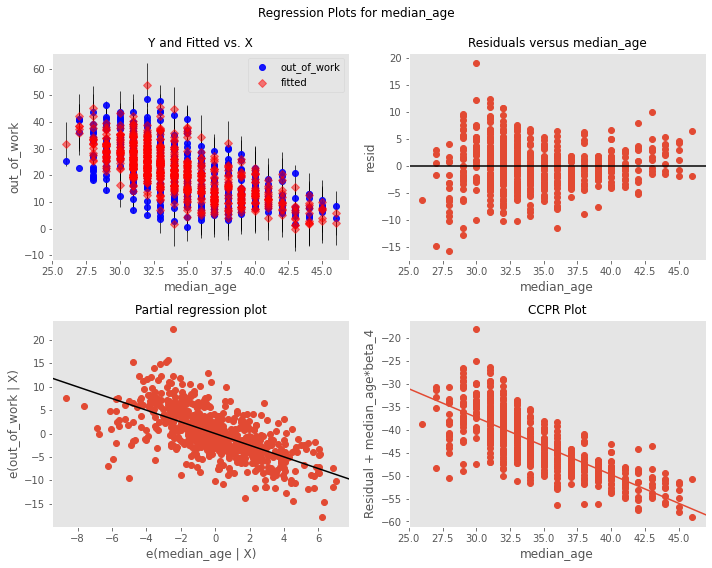

In [99]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'median_age',fig=fig)

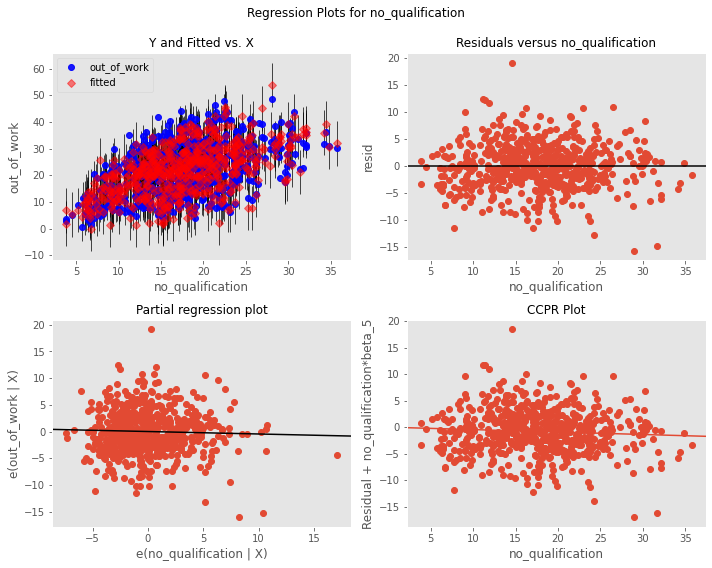

In [101]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'no_qualification',fig=fig)

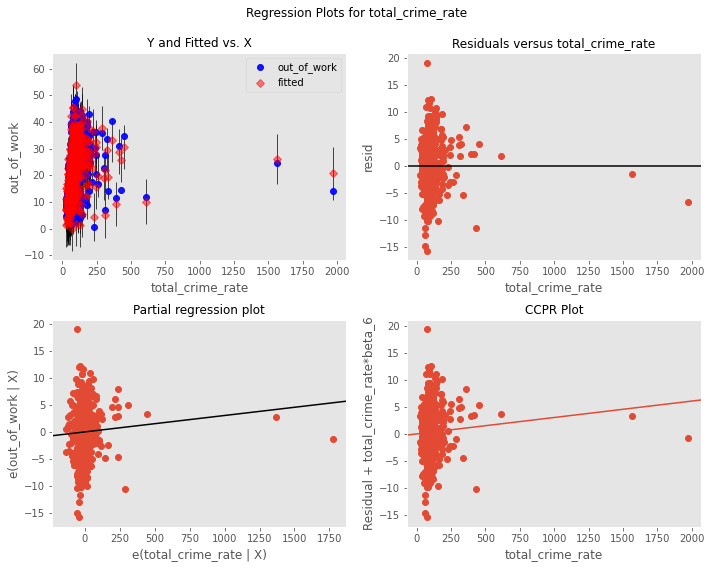

In [102]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'total_crime_rate',fig=fig)

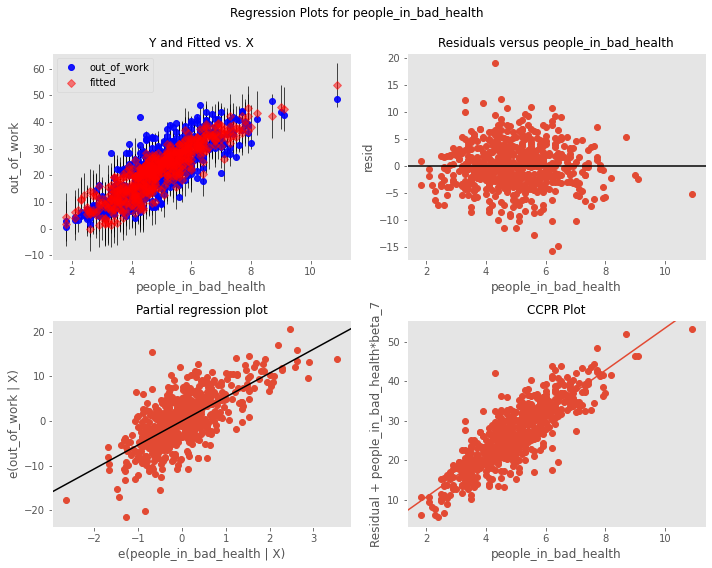

In [103]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'people_in_bad_health',fig=fig)

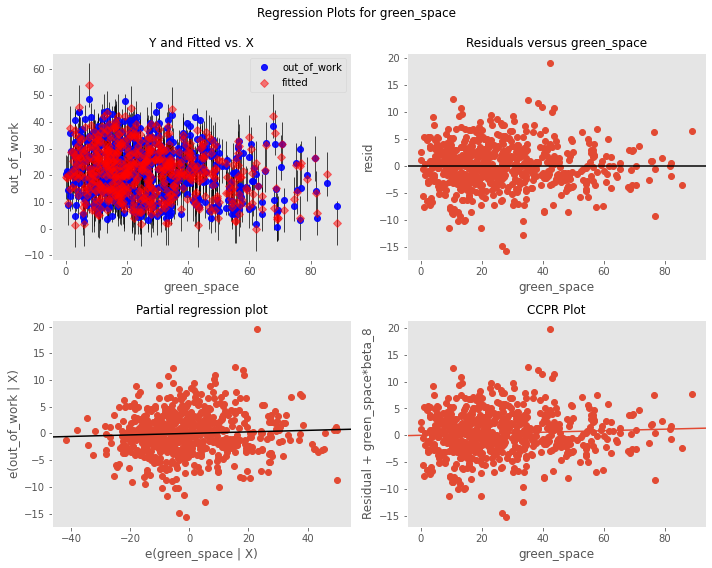

In [104]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'green_space',fig=fig)

## Simple linear Regression

Out of Work vs Norm_income

In [148]:
X_values_linear = sm.add_constant(norm_income)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     165.8
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           8.22e-34
Time:                        18:25:34   Log-Likelihood:                -2262.1
No. Observations:                 625   AIC:                             4528.
Df Residuals:                     623   BIC:                             4537.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [149]:
X_values_linear = sm.add_constant(rate_of_drugs_crime)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     167.8
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           3.80e-34
Time:                        18:25:37   Log-Likelihood:                -2261.3
No. Observations:                 625   AIC:                             4527.
Df Residuals:                     623   BIC:                             4536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0135      0.771     16.869      0.0

In [150]:
X_values_linear = sm.add_constant(no_english_in_household)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     89.52
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           6.12e-20
Time:                        18:25:39   Log-Likelihood:                -2293.9
No. Observations:                 625   AIC:                             4592.
Df Residuals:                     623   BIC:                             4601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6504      0.757     20.674      0.0

In [151]:
X_values_linear = sm.add_constant(median_age)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     502.6
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           4.48e-82
Time:                        18:25:44   Log-Likelihood:                -2151.0
No. Observations:                 625   AIC:                             4306.
Df Residuals:                     623   BIC:                             4315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.1526      2.618     

In [152]:
X_values_linear = sm.add_constant(population_density)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.011e+36
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:25:46   Log-Likelihood:                 21561.
No. Observations:                 625   AIC:                        -4.312e+04
Df Residuals:                     623   BIC:                        -4.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [153]:
X_values_linear = sm.add_constant(unemployment_rate)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1000.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          1.16e-131
Time:                        18:25:53   Log-Likelihood:                -2036.6
No. Observations:                 625   AIC:                             4077.
Df Residuals:                     623   BIC:                             4086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [154]:
X_values_linear = sm.add_constant(no_qualification)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     201.7
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           7.24e-40
Time:                        18:25:55   Log-Likelihood:                -2248.2
No. Observations:                 625   AIC:                             4500.
Df Residuals:                     623   BIC:                             4509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [155]:
X_values_linear = sm.add_constant(total_crime_rate)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     11.22
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           0.000857
Time:                        18:25:57   Log-Likelihood:                -2330.3
No. Observations:                 625   AIC:                             4665.
Df Residuals:                     623   BIC:                             4673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    20.63

In [157]:
X_values_linear = sm.add_constant(people_in_bad_health)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1309.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          3.02e-155
Time:                        18:26:03   Log-Likelihood:                -1982.2
No. Observations:                 625   AIC:                             3968.
Df Residuals:                     623   BIC:                             3977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [158]:
X_values_linear = sm.add_constant(green_space)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     19.73
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           1.06e-05
Time:                        18:26:05   Log-Likelihood:                -2326.1
No. Observations:                 625   AIC:                             4656.
Df Residuals:                     623   BIC:                             4665.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       